<a href="https://colab.research.google.com/github/minako-aino/data-analysis-2023/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Базові алгоритми навчання без учителя та обробка текстових даних (Scikit-learn lib)

In [30]:
from google.colab import drive
import string

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
import string

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB

1. Зниження розмірності і візуалізація даних

Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.


In [ ]:
drive.mount('/content/drive')

Dataset: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [ ]:
# upload data
df = pd.read_csv('/content/drive/MyDrive/IPT masters/9 sem/Інтелектуальний аналіз даних/lab1/smoking_driking_dataset.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
# process the dataset - form lab 1
# drop na
df = df.dropna()

# drop duplicates
df = df.drop_duplicates()

# encode sex
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])

# encode DRK_YN
encode = {"DRK_YN": {"Y": 1, "N": 0}}
df = df.replace(encode)

df = df.drop(df[(df['waistline'] > 200) | (df['waistline'] < 10)].index)
df = df.drop(df[(df['height'] > 250) | (df['height'] < 100)].index)

In [ ]:
df = df.drop(['sight_left', 'sight_right', 'hear_right', 'hear_left', 'urine_protein', 'serum_creatinine', 'triglyceride', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'SGOT_AST', 'SGOT_ALT', 'LDL_chole', 'HDL_chole'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991262 entries, 0 to 991345
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991262 non-null  int64  
 1   age               991262 non-null  int64  
 2   height            991262 non-null  int64  
 3   weight            991262 non-null  int64  
 4   waistline         991262 non-null  float64
 5   hemoglobin        991262 non-null  float64
 6   gamma_GTP         991262 non-null  float64
 7   SMK_stat_type_cd  991262 non-null  float64
 8   DRK_YN            991262 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 75.6 MB


In [ ]:
df = df.iloc[:10000,:]

In [ ]:
x = df.drop('sex', axis = 1)
y = df['sex']

PCA:

In [ ]:
# preprocess - part 2
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [ ]:
# perform PCA on the Preprocessed Dataset
pca = PCA(n_components=2)
pca_res = pca.fit_transform(scaled_x)

In [ ]:
print(pca.components_)

[[-0.17555283  0.44419137  0.46626336  0.3544226   0.40865074  0.21361104
   0.35551955  0.29973167]
 [ 0.67066671 -0.21154919  0.22284001  0.55407039 -0.01312012  0.19638686
  -0.08076819 -0.32177321]]


In [ ]:
# the principal components capture 58%
print(sum(pca.explained_variance_ratio_))

0.580163891497758


In [ ]:
nums = np.arange(8)

ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_x)
  ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

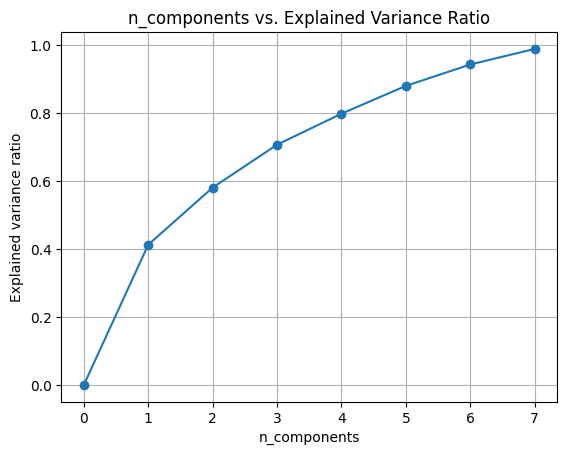

In [ ]:
plt.figure()
plt.grid()
plt.plot(nums, ratio, marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

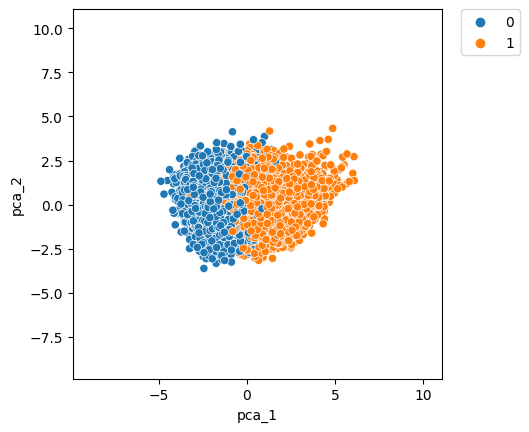

In [ ]:
pca_result_df = pd.DataFrame({'pca_1': pca_res[:,0], 'pca_2': pca_res[:,1], 'label': y})

fig, ax = plt.subplots(1)

sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax)
lim = (pca_res.min()-5, pca_res.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

tSNE:

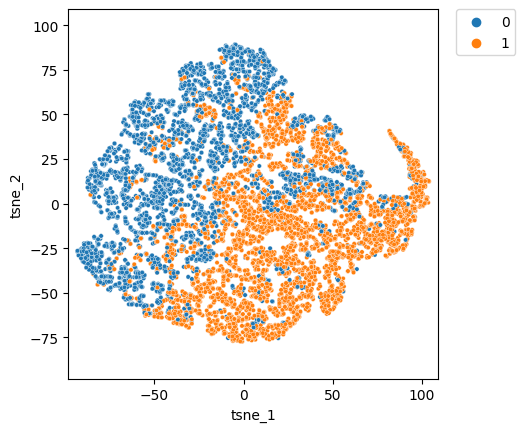

In [ ]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(x)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

2. Кластерний аналіз

1) За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.


In [ ]:
n_colors = [64, 32, 16, 8]
img = Image.open("/content/drive/MyDrive/IPT masters/9 sem/Інтелектуальний аналіз даних/lab2/trinity.jpeg")

In [ ]:
# Convert to floats instead of the default 8 bits integer coding.
img = np.array(img, dtype=np.float64) / 255

#transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans_arr = []
labels_arr = []

for i in range(len(n_colors)):
    kmeans_arr.append(KMeans(n_clusters=n_colors[i], random_state=0).fit(image_array_sample))
    labels_arr.append(kmeans_arr[i].predict(image_array))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


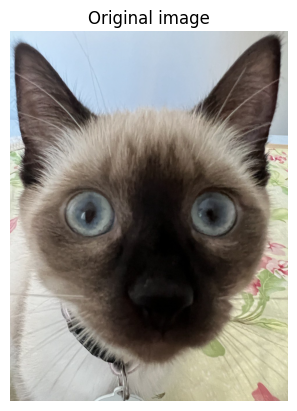

In [ ]:
plt.figure(i)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(img)

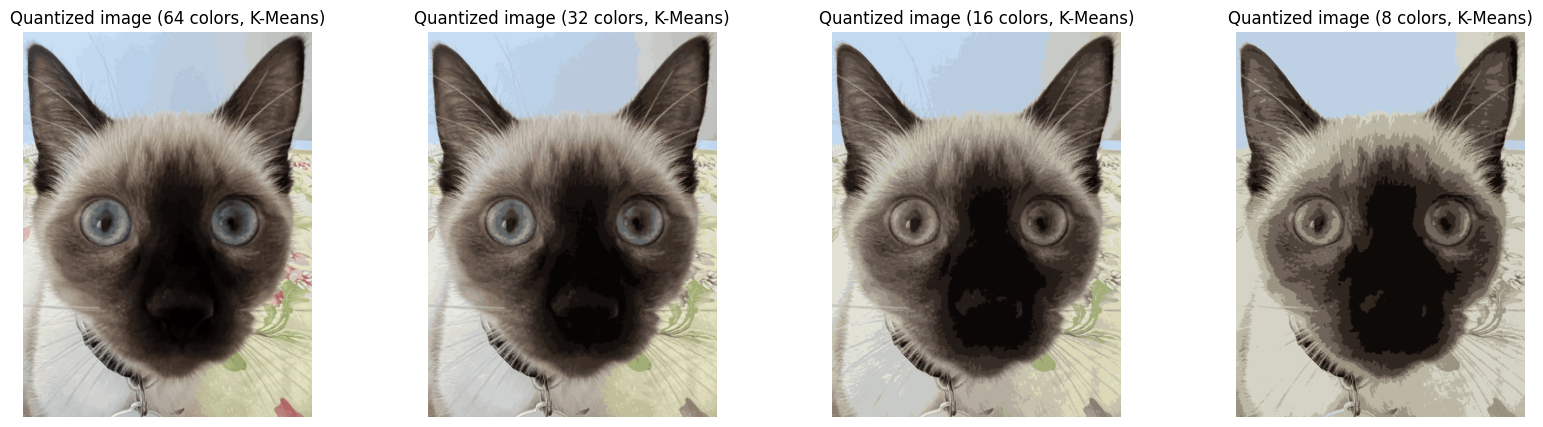

In [ ]:
num_images = len(n_colors)
fig, axes = plt.subplots(1, num_images, figsize=(num_images * 5, 5))

# Loop through the images and display them in the subplots
for i in range(num_images):
    axes[i].imshow(kmeans_arr[i].cluster_centers_[labels_arr[i]].reshape(w, h, -1))
    axes[i].set_title(f"Quantized image ({n_colors[i]} colors, K-Means)")
    axes[i].axis("off")

plt.show()

3. Обробка та класифікація текстових даних

Завантажте набір текстових даних (з мітками класів).

Dataset: https://www.kaggle.com/datasets/kmldas/apple-iphone-se-reviews-ratings/

In [9]:
txt = pd.read_csv('/content/drive/MyDrive/IPT masters/9 sem/Інтелектуальний аналіз даних/lab2/APPLE_iPhone_SE.csv')
txt.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...


Проведіть передобробку даних (видаліть стоп-слова, пунктуацію).

In [10]:
txt = txt.drop(['Comment'], axis=1)

def remove_punctuation(dataset, text_column_name):
    # Define a translation table to remove punctuation
    translator = str.maketrans('', '', string.punctuation)

    # Apply the translation to the specified text column
    dataset[text_column_name] = dataset[text_column_name].apply(lambda x: x.translate(translator))

    return dataset

def lowercase_column_words(dataset, text_column_name):
    dataset[text_column_name] = dataset[text_column_name].str.lower()
    return dataset

txt = remove_punctuation(txt, "Reviews")
txt = lowercase_column_words(txt, "Reviews")

txt.head()

,Ratings,Reviews
0,5,great camera for pics and videos battery life ...
1,5,great device let me tell the pros1 superb buil...
2,5,who all loves older size ie 47 inch type shoul...
3,5,this iphone se is the best phone ever you get ...
4,5,this is my second iphone after iphone 4s i’ve ...


In [11]:
def remove_words_from_text(text, words_to_delete):
    words = text.split()
    filtered_words = [word for word in words if word not in words_to_delete]
    return ' '.join(filtered_words)

def delete_words_from_column(dataset, text_column_name, words_to_delete):
    dataset[text_column_name] = dataset[text_column_name].apply(
        lambda text: remove_words_from_text(text, words_to_delete)
    )
    return dataset

txt = delete_words_from_column(txt, "Reviews", ["read", "more"])
txt.head()

,Ratings,Reviews
0,5,great camera for pics and videos battery life ...
1,5,great device let me tell the pros1 superb buil...
2,5,who all loves older size ie 47 inch type shoul...
3,5,this iphone se is the best phone ever you get ...
4,5,this is my second iphone after iphone 4s i’ve ...


In [12]:
def clean_text(text):
  stop_words = stopwords.words("english")
  text = text.lower()
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  return text

import nltk
nltk.download('stopwords')

txt['Reviews'] = txt['Reviews'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


За допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі.

In [13]:
def wordcloud(rating_value):
  text = ' '.join(txt[txt['Ratings'] == rating_value]['Reviews'])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

  # Display the word cloud using matplotlib
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')  # Turn off the axis
  plt.show()

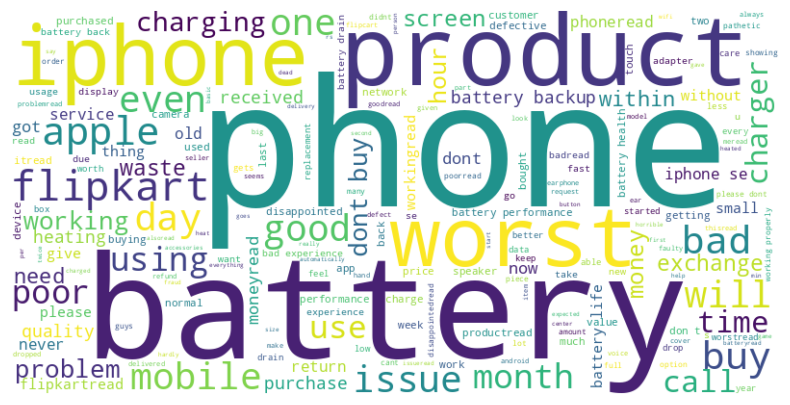

In [ ]:
wordcloud(1)

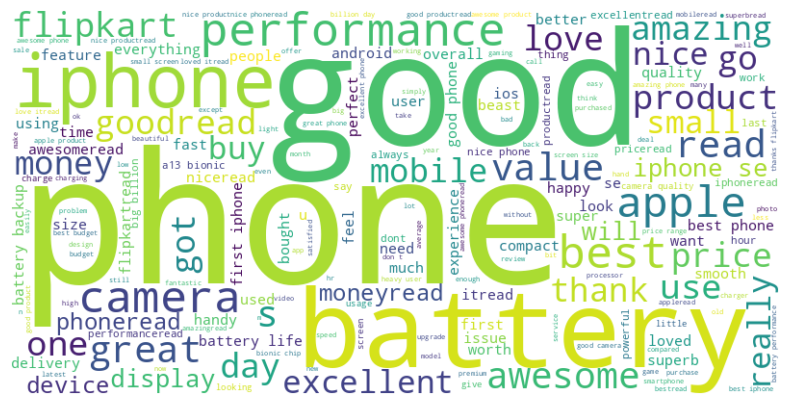

In [ ]:
wordcloud(5)

Оскільки ми і так знаємо, що наш датасет про телефони, видалимо це слово.

In [ ]:
txt = delete_words_from_column(txt, "Reviews", ["phone"])

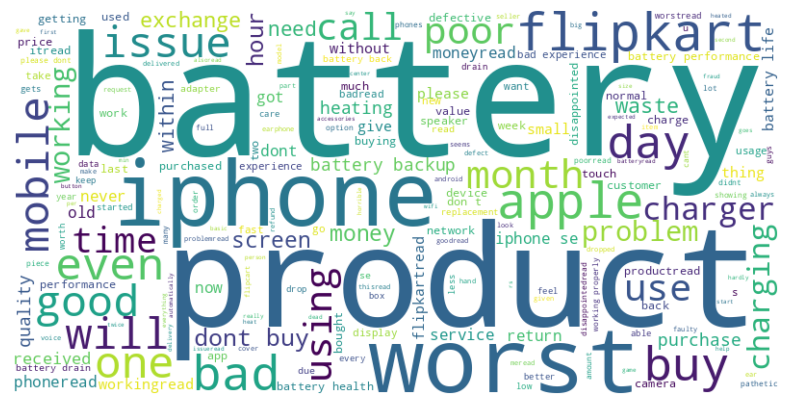

In [ ]:
wordcloud(1)

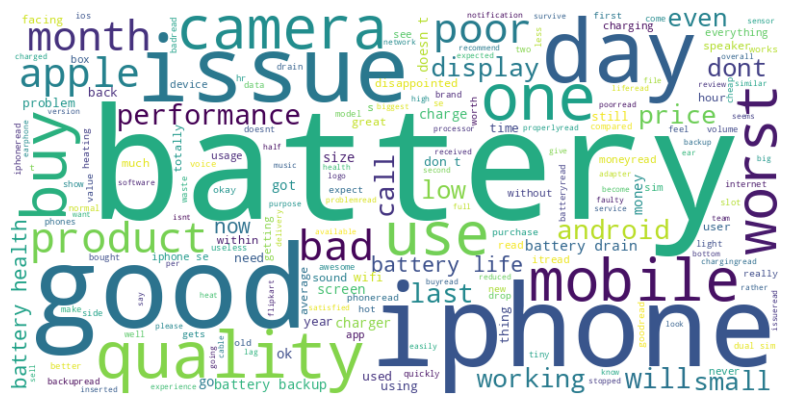

In [ ]:
wordcloud(2)

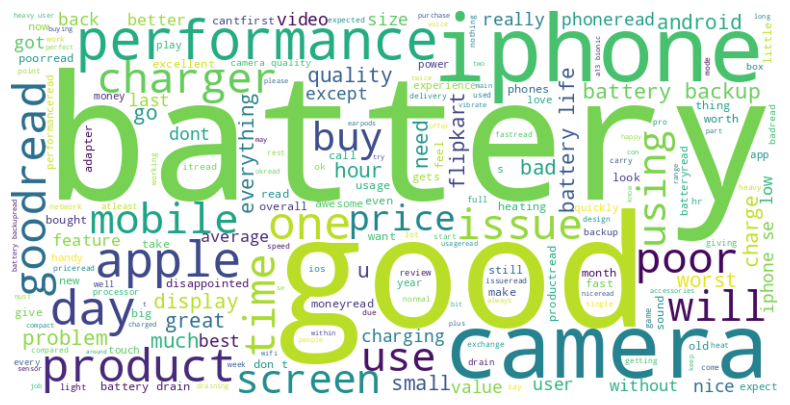

In [ ]:
wordcloud(3)

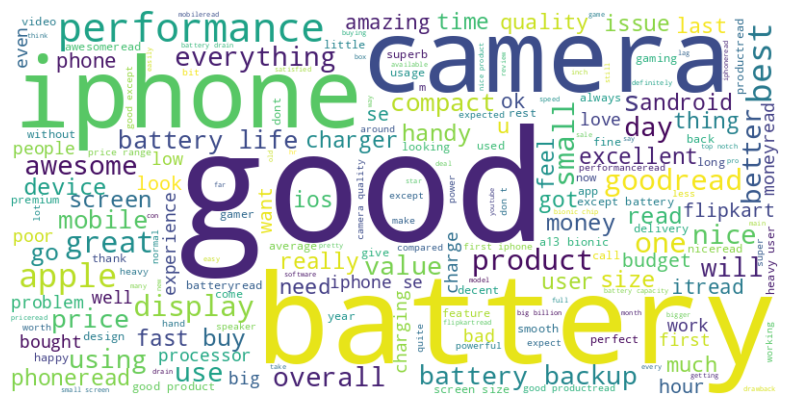

In [ ]:
wordcloud(4)

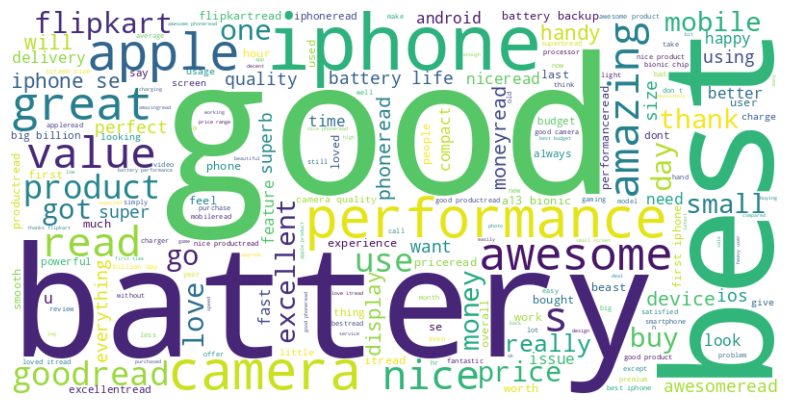

In [ ]:
wordcloud(5)

Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer).

In [14]:
txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  9713 non-null   int64 
 1   Reviews  9713 non-null   object
dtypes: int64(1), object(1)
memory usage: 151.9+ KB


In [15]:
# text split
x = txt['Reviews']
y = txt['Ratings']
X_train, X_test, y_train, y_test = train_test_split(txt['Reviews'], txt['Ratings'], test_size=0.20)

In [16]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [18]:
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train_transformed, y_train)
y_pred = logreg.predict(X_test_transformed)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      0.43      0.46       103
           2       0.29      0.10      0.15        40
           3       0.34      0.12      0.17       121
           4       0.33      0.18      0.23       335
           5       0.77      0.93      0.84      1344

    accuracy                           0.70      1943
   macro avg       0.44      0.35      0.37      1943
weighted avg       0.64      0.70      0.66      1943

[[  44    4    5   11   39]
 [  14    4    5    1   16]
 [  16    3   14   23   65]
 [   9    2   12   60  252]
 [   6    1    5   88 1244]]


In [35]:
mnb = MultinomialNB()
mnb.fit(X_train_transformed, y_train)
y_pred = mnb.predict(X_test_transformed)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.20      0.31       103
           2       0.00      0.00      0.00        40
           3       0.33      0.01      0.02       121
           4       0.24      0.08      0.12       335
           5       0.73      0.98      0.84      1344

    accuracy                           0.70      1943
   macro avg       0.40      0.25      0.26      1943
weighted avg       0.61      0.70      0.62      1943

[[  21    0    0   22   60]
 [   4    0    1    8   27]
 [   3    0    1   30   87]
 [   2    0    1   27  305]
 [   1    0    0   26 1317]]


In [19]:
cnb = ComplementNB()
cnb.fit(X_train_transformed.toarray(), y_train)
cnb_y_pred = cnb.predict(X_test_transformed.toarray())

print(classification_report(y_test, cnb_y_pred))
print(confusion_matrix(y_test, cnb_y_pred))

              precision    recall  f1-score   support

           1       0.35      0.50      0.41       103
           2       0.14      0.07      0.10        40
           3       0.28      0.12      0.16       121
           4       0.28      0.19      0.22       335
           5       0.79      0.89      0.84      1344

    accuracy                           0.68      1943
   macro avg       0.37      0.35      0.35      1943
weighted avg       0.63      0.68      0.65      1943

[[  51    6    6   19   21]
 [  16    3    5    9    7]
 [  26    4   14   41   36]
 [  13    4    7   62  249]
 [  39    4   18   92 1191]]


In [20]:
bnb = BernoulliNB()
bnb.fit(X_train_transformed.toarray(), y_train)
bnb_y_pred = bnb.predict(X_test_transformed.toarray())

print(classification_report(y_test, bnb_y_pred))
print(confusion_matrix(y_test, bnb_y_pred))

              precision    recall  f1-score   support

           1       0.67      0.08      0.14       103
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00       121
           4       0.30      0.20      0.24       335
           5       0.72      0.92      0.81      1344

    accuracy                           0.67      1943
   macro avg       0.34      0.24      0.24      1943
weighted avg       0.59      0.67      0.61      1943

[[   8    0    0   16   79]
 [   1    0    1    7   31]
 [   1    0    0   27   93]
 [   1    0    0   66  268]
 [   1    0    1  105 1237]]
